A clustering algorithm attempts
to find distinct groups of data *without reference to any labels*.

Gaussian mixture model (GMM): a powerful clustering method. A GMM attempts
to model the data as a collection of Gaussian blobs.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis = 1)  # loại bỏ theo cột
y_iris = iris['species']

In [6]:
from sklearn.decomposition import PCA      # 1. choose the model class 
model = PCA(n_components = 2)              # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                          # 3. fit to data. notice y is not specified!
X_2D = model.transform(X_iris)             # 4. Transform the data to two dimensions

In [7]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

In [8]:
from sklearn import mixture            # 1. choose the model class
model = mixture.GaussianMixture(n_components = 3, 
            covariance_type = 'full')  # 2. choose the hyperparameters
model.fit(X_iris)                      # 3. fit model to data. notice y is not specified!
y_gmm = model.predict(X_iris)          # 4. determine cluster labels 

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


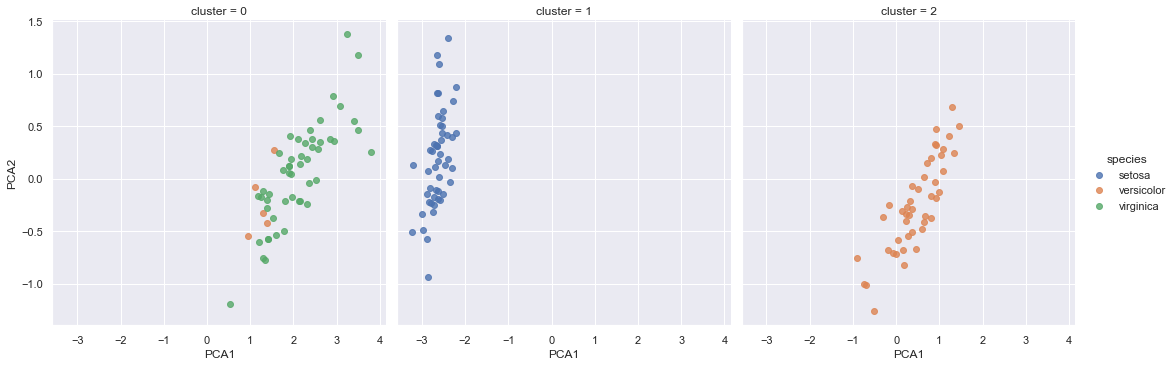

In [9]:
# plot the result 
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', col = 'cluster', fit_reg = False)

NX: the **setosa** species is separated perfectly within
cluster 0, while there remains a small amount of mixing between **versicolor** and **virginica**.

This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could
automatically identify the presence of these different groups of species with a simple clustering algorithm!